### 1. Importing packages

Let's start importing the packages that we will use is this analysis.

In [14]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

---

### 2. Reading the data

In [57]:
data_per_month_path = sorted(glob.glob('dataset/sales_[0-1][0-9].csv'))
data_per_month_path

['dataset/sales_01.csv',
 'dataset/sales_02.csv',
 'dataset/sales_03.csv',
 'dataset/sales_04.csv',
 'dataset/sales_05.csv',
 'dataset/sales_06.csv',
 'dataset/sales_07.csv',
 'dataset/sales_08.csv',
 'dataset/sales_09.csv',
 'dataset/sales_10.csv',
 'dataset/sales_11.csv',
 'dataset/sales_12.csv']

In [25]:
sales = pd.concat([pd.read_csv(path) for path in data_per_month_path])
sales

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,141234,iPhone,1,700,01/22 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03 10:39,"778 River St, Dallas, TX 75001"


---

### 3. Cleaning the data

In [26]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 5.7+ MB


In [27]:
sales[sales.isnull().any(axis=1)]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
sales = sales.dropna(how='all')

In [29]:
sales[sales['product'] == 'product']

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
1073,order_id,product,quantity_ordered,price_each,order _date,purchase_address
1102,order_id,product,quantity_ordered,price_each,order _date,purchase_address
1194,order_id,product,quantity_ordered,price_each,order _date,purchase_address
1897,order_id,product,quantity_ordered,price_each,order _date,purchase_address
2463,order_id,product,quantity_ordered,price_each,order _date,purchase_address
...,...,...,...,...,...,...
23198,order_id,product,quantity_ordered,price_each,order _date,purchase_address
23337,order_id,product,quantity_ordered,price_each,order _date,purchase_address
23748,order_id,product,quantity_ordered,price_each,order _date,purchase_address
24192,order_id,product,quantity_ordered,price_each,order _date,purchase_address


In [30]:
sales = sales[sales['product'] != 'product']

In [46]:
sales.to_csv('dataset/sales.csv', index=False)

In [45]:
numeric_cols = ['order_id', 'quantity_ordered', 'price_each']
sales.loc[:, numeric_cols] = sales.loc[:, numeric_cols].copy().apply(pd.to_numeric)

In [52]:
order_date = sales['order_date'].copy()
sales.loc[:, 'order_date'] = pd.to_datetime(order_date, format='%m/%d %H:%M')

/home/neto/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [53]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int64         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


---

### 4. Analysing the data

In [81]:
#sales = pd.read_csv('sales.csv')
#sales.info()

In [82]:
order_month = sales['order_date'].dt.month
sales.insert(5, 'order_month', order_month)

order_hour = sales['order_date'].dt.hour
sales.insert(5, 'order_hour', order_hour)

price_total = sales['quantity_ordered'] * sales['price_each']
sales.insert(4, 'price_total', price_total)

sales

,order_id,product,quantity_ordered,price_each,price_total,order_date,order_hour,order_month,purchase_address
0,259358,34in Ultrawide Monitor,1,379.99,379.99,2019-10-28 10:56:00,10,10,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,389.99,2019-10-28 17:26:00,17,10,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,5.98,2019-10-24 17:20:00,17,10,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,149.99,2019-10-14 22:26:00,22,10,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,11.99,2019-10-07 16:10:00,16,10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...,...,...
185945,295660,AAA Batteries (4-pack),2,2.99,5.98,2019-11-04 14:17:00,14,11,"574 4th St, Los Angeles, CA 90001"
185946,295661,USB-C Charging Cable,1,11.95,11.95,2019-11-23 07:22:00,7,11,"359 1st St, Austin, TX 73301"
185947,295662,Lightning Charging Cable,1,14.95,14.95,2019-11-13 16:12:00,16,11,"900 10th St, Boston, MA 02215"
185948,295663,AAA Batteries (4-pack),1,2.99,2.99,2019-11-17 17:08:00,17,11,"592 Sunset St, Boston, MA 02215"


##### a) What months had the most sales?

In [55]:
per_month = sales.groupby('order_month')['price_total'].sum()
per_month

KeyError: 'Column not found: price_total'

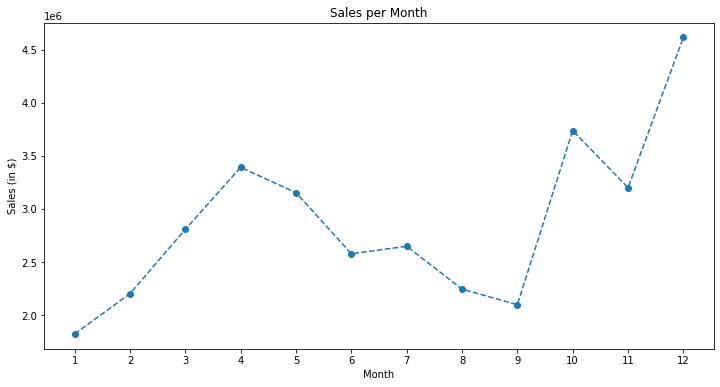

In [98]:
plt.figure(figsize=(12, 6))

plt.plot(per_month.index, per_month.values, 'o--')

plt.title('Sales per Month')
plt.xlabel('Month')
plt.xticks(per_month.index)
plt.ylabel('Sales (in $)')

plt.show()

##### What cities had the most sales?

In [87]:
def get_city(address):
    city = address.split(', ')[1]
    state = address.split()[-2]
    return f'{city}, {state}'

sales['purchase_city'] = sales['purchase_address'].map(get_city)
sales

,order_id,product,quantity_ordered,price_each,price_total,order_date,order_hour,order_month,purchase_address,purchase_city
0,259358,34in Ultrawide Monitor,1,379.99,379.99,2019-10-28 10:56:00,10,10,"609 Cherry St, Dallas, TX 75001","Dallas, TX"
1,259359,27in 4K Gaming Monitor,1,389.99,389.99,2019-10-28 17:26:00,17,10,"225 5th St, Los Angeles, CA 90001","Los Angeles, CA"
2,259360,AAA Batteries (4-pack),2,2.99,5.98,2019-10-24 17:20:00,17,10,"967 12th St, New York City, NY 10001","New York City, NY"
3,259361,27in FHD Monitor,1,149.99,149.99,2019-10-14 22:26:00,22,10,"628 Jefferson St, New York City, NY 10001","New York City, NY"
4,259362,Wired Headphones,1,11.99,11.99,2019-10-07 16:10:00,16,10,"534 14th St, Los Angeles, CA 90001","Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...
185945,295660,AAA Batteries (4-pack),2,2.99,5.98,2019-11-04 14:17:00,14,11,"574 4th St, Los Angeles, CA 90001","Los Angeles, CA"
185946,295661,USB-C Charging Cable,1,11.95,11.95,2019-11-23 07:22:00,7,11,"359 1st St, Austin, TX 73301","Austin, TX"
185947,295662,Lightning Charging Cable,1,14.95,14.95,2019-11-13 16:12:00,16,11,"900 10th St, Boston, MA 02215","Boston, MA"
185948,295663,AAA Batteries (4-pack),1,2.99,2.99,2019-11-17 17:08:00,17,11,"592 Sunset St, Boston, MA 02215","Boston, MA"


In [52]:
per_city = sales.groupby('purchase_city')['price_total'].sum()
per_city

purchase_city
Atlanta, GA          2.795499e+06
Austin, TX           1.819582e+06
Boston, MA           3.661642e+06
Dallas, TX           2.767975e+06
Los Angeles, CA      5.452571e+06
New York City, NY    4.664317e+06
Portland, ME         4.497583e+05
Portland, OR         1.870732e+06
San Francisco, CA    8.262204e+06
Seattle, WA          2.747755e+06
Name: price_total, dtype: float64

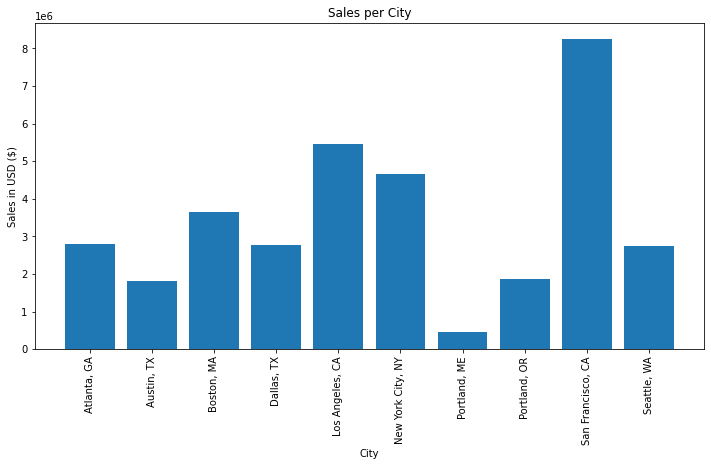

In [97]:
plt.figure(figsize=(12, 6))

plt.bar(per_city.index, per_city.values)

plt.title('Sales per City')
plt.xlabel('City')
plt.xticks(rotation='vertical')
plt.ylabel('Sales in USD ($)')


plt.show()

#### What time should we display advertisiments to maximize likelihood of custumer's buiying product?

In [90]:
sales['order_hour'].unique()

array([10, 17, 22, 16, 18, 11, 13, 23, 12, 20,  8,  0, 14, 15, 21, 19,  9,
        4,  2,  7,  6,  1,  5,  3], dtype=int64)

In [91]:
per_hour = sales.groupby('order_hour')['price_total'].sum()
per_hour

order_hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: price_total, dtype: float64

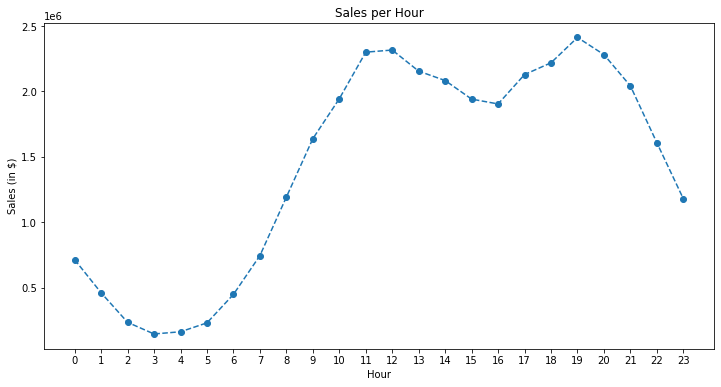

In [96]:
plt.figure(figsize=(12, 6))

plt.plot(per_hour.index, per_hour.values, 'o--')

plt.title('Sales per Hour')
plt.xlabel('Hour')
plt.xticks(per_hour.index)
plt.ylabel('Sales (in $)')

plt.show()

#### What products are most often sold together?

In [ ]:
sales.head(20)

In [ ]:
sales[sales['Order ID'] == 160873]

In [ ]:
sales_temp = sales.sort_values('Order ID', axis=0)

In [ ]:
sales_temp = sales_temp[sales_temp['Quantity Ordered'] > 1]

In [ ]:
sales_temp['Product'].unique()

In [ ]:
sales_temp['Product'].value_counts()

In [ ]:
per_product = sales_temp.groupby('Product')['Order ID'].count().sort_index()
per_product_ge_20 = per_product[per_product > 200]
per_product_ge_20

In [ ]:
plt.bar(per_product_ge_20.index, per_product_ge_20.values)

plt.xticks(rotation='vertical')

plt.show()

In [ ]:
per_product.sort_values(ascending=False).iloc[0] / len(sales)

### What products are most often sold together? (part II)

In [ ]:
sales

In [ ]:
sales['Order ID']

In [ ]:
per_id = sales.groupby('Order ID')['Order ID'].count() > 1
per_id[per_id == True]

In [ ]:
ids_duplicate = per_id[per_id == True].index
ids_duplicate

In [ ]:
sales_mult = sales[sales['Order ID'].isin(ids_duplicate)]
sales_mult

In [ ]:
sales_mult['Order ID'].value_counts()

In [ ]:
sales_mult

In [ ]:
sales_mult['Product'] + ';'

In [ ]:
sales_mult = sales_mult.groupby('Order ID')['Product'].sum()

In [ ]:
sales_mult

In [ ]:
sales_mult = sales_mult.str.split(';;')

In [ ]:
sales_mult.head()

In [ ]:
d = sales_mult.to_dict()

In [ ]:
for key, value in d.items():
    value = sorted(value)
    d[key] = value[1:]

In [ ]:
d

In [ ]:
import itertools

In [ ]:
combs = itertools.combinations(['Apple Airpods Headphones', 'Wired Headphones', 'iPhone'], 2)
for i in combs:
    print(list(i))

In [ ]:

new_values = []
old_keys = []
for key, value in d.items():
    if len(value) > 2:
        combs = itertools.combinations(value, 2)
        for ls in combs:
            new_values.append(list(ls))     
        old_keys.append(key)

In [ ]:
new_values

max_key = max(d)+1
for v in new_values:
    d[max_key] = v
    max_key += 1

In [ ]:
for k in old_keys:
    d.pop(k)

In [ ]:
for k, v in d.items():
    if len(v) != 2:
        print('erro')
    v = sorted(v)
    d[k] = v

In [ ]:
df = pd.DataFrame(d.values(), columns=list('ab'))
df

In [ ]:
df['Product Pair'] = df['a'] + ' and ' + df['b']
df['Product Pair']

In [ ]:
#df = df.drop(['a', 'b'], axis=1)
df

In [ ]:
per_pair = df['Product Pair'].value_counts()
per_pair

In [ ]:
per_pair = per_pair[per_pair >= 100]
per_pair

In [ ]:
per_pair = per_pair.sort_index()
per_pair

In [ ]:
plt.bar(per_pair.index, per_pair.values)

plt.xticks(rotation='vertical')

plt.show()

##### What products has the most sales?

In [115]:
per_product = sales.groupby('product')['price_total'].sum()
per_product

product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: price_total, dtype: float64

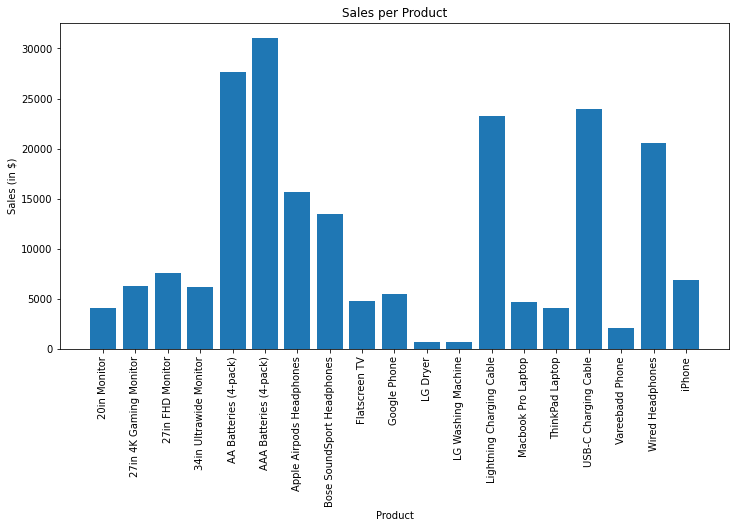

In [114]:
plt.figure(figsize=(12, 6))

plt.bar(per_product.index, per_product.values)

plt.title('Sales per Product')
plt.xlabel('Product')
plt.xticks(rotation='vertical')
plt.ylabel('Sales (in $)')

plt.show()

In [ ]:
plt.bar(per_product.index, per_product.values)

plt.xticks(rotation='vertical')

plt.show()

In [ ]:
per_price = sales.groupby('Product')['Price Each'].first().sort_index()

plt.plot(per_price.index, per_price.values, 'r--')

plt.xticks(rotation='vertical')

plt.show()

In [ ]:
per_price = (per_price / per_price.sum()) * 100
per_price

In [ ]:
per_product = per_product.sort_values()
per_product

In [ ]:
per_price = per_price[per_product.index]
per_price

In [ ]:
plt.bar(per_product.index, per_product.values)
plt.plot(per_price.index, per_price.values, 'r--')

plt.xticks(rotation='vertical')
#plt.grid(linestyle='-')
plt.show()

In [ ]:
df = pd.concat([per_product, per_price], axis=1)
df

In [ ]:
corr_mat = df.corr()

corr_mat

In [ ]:
!pip list

In [ ]:
sales.corr()

In [ ]:
plt.imshow(sales.corr(), cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
di = pd.DataFrame(['a', 'b', 'c', 'a', 'c', 'c'], columns=['col'])
di

In [ ]:

di.groupby('col')['col'].sum?

In [ ]:
def f(x):
    c = ''
    for i in x:
        c += i + ','
    return c

#help(di.groupby('col')['col'].agg)
di.groupby('col')['col'].agg(f)